# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## Data Cleaning and Validation

I checked for missing values and filled them with the median for numeric columns (calories, carbohydrate, sugar, protein) and assumed 'Low' for missing high_traffic. I noticed that if a row was missing a value, the calories, carbohydrates, sugar and protein columns were all missing. This explains all columns having 52 missing values each.

I checked for inconsistencies in categorical columns (category, high_traffic) and saved the cleaned data which will be used from this point forth.

In [10]:
import pandas as pd

data = pd.read_csv('recipe.csv')

# Checking for missing values
print(data.isnull().sum())

# Handling missing values
data['calories'].fillna(data['calories'].median(), inplace=True)
data['carbohydrate'].fillna(data['carbohydrate'].median(), inplace=True)
data['sugar'].fillna(data['sugar'].median(), inplace=True)
data['protein'].fillna(data['protein'].median(), inplace=True)
data['high_traffic'].fillna('Low', inplace=True)  # Assuming 'Low' for missing high_traffic
data['servings'] = pd.to_numeric(data['servings'], errors='coerce')
data['servings'].fillna(data['servings'].median(), inplace=True)

# Checking for inconsistencies in categorical data
print(data['category'].unique())
print(data['high_traffic'].unique())

# Saving the cleaned data
data.to_csv('cleaned_recipe.csv', index=False)

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
['High' 'Low']


## Exploratory Analysis

1. Distribution of Calories
    Figure Description:
    A histogram showing the distribution of calories across all recipes.

    The x-axis represents the number of calories, and the y-axis represents the frequency (number     of recipes).

    Findings:
    Skewed Distribution: The distribution of calories is right-skewed, meaning that most recipes     have a lower calorie count, but there are some recipes with very high calorie counts.

    Outliers: There are a few recipes with extremely high calorie counts (e.g., over 2000             calories), which could be considered outliers.

    Range: The calorie values range from a low of around 0 to a high of over 3000 calories.

    Most Recipes: The majority of recipes fall within the range of 200 to 1000 calories, with a       peak around 500 calories.

    Implications:
    The high-calorie recipes might be outliers or special dishes (e.g., desserts or large meals).

    The model should account for the skewed distribution when making predictions.

2. Number of Recipes per Category
    Figure Description:
    A count plot showing the number of recipes in each category.

    The x-axis represents the recipe categories, and the y-axis represents the count of recipes.

    Findings:
    Imbalance in Categories: There is a considerable imbalance in the number of recipes across       categories.

    Breakfast has the highest number of recipes while One Dish Meal has the lowest

    Popular Categories: Breakfast, Chicken Breast, and Beverages are the most popular categories.

    Less Popular Categories: One dish meal and chicken are less common.

    Implications:
    The model should account for this imbalance when making predictions.

Feature engineering could involve giving more weight to less common categories to ensure they are not overlooked.

3. Calories vs Protein Content
    Figure Description:
    A scatter plot showing the relationship between calories and protein content, with the hue       representing high_traffic (High or Low).

    The x-axis represents calories, and the y-axis represents protein content.

    Findings:
    Positive Correlation: There is a slight positive correlation between calories and protein         content meaning that recipes with higher calories tend to have higher protein content.


    Clusters: There are no clear clusters of "High Traffic" and "Low Traffic" recipes based on       the calorie and carbohydrate content.

    Implications:
    The model can potentially use the relationship between calories and carbohydrate content to       predict high-traffic recipes due to the slight correlation.

Feature engineering could involve creating interaction terms (e.g., calories * carbohydrate) to capture this relationship.

4. Correlation Matrix
    Figure Description:
    A heatmap showing the correlation between numeric features (e.g., calories, carbohydrate,         sugar, protein).

    The x-axis and y-axis represent the features, and the color intensity represents the             correlation coefficient.

    Findings:
    Weak Correlations: Most features have weak correlations with each other.

    For example, the correlation between calories and carbohydrate is positive but not very           strong.

    No Strong Multicollinearity: There are no strong correlations (e.g., > 0.8) between features,     which is good for model training.

    Negative Correlations: Some features have negative correlations, such as sugar and protein.

## Implications:
The model can use these weak correlations to make predictions, but no single feature dominates the others.

Feature selection should focus on features that have the most predictive power, even if the correlations are weak.

Summary of Findings
Distribution of Calories:

Most recipes have a calorie count between 200 and 1000, with a peak around 500 calories.

High-calorie recipes are outliers and may need special handling.

Number of Recipes per Category:

Breakfast, Chicken Breast, and Beverages are the most popular categories.

One dish meal and chicken are less common., which may affect model performance.

Calories vs Carbohydrate Content:

There is a positive correlation between calories and carbohydrate content.

High-traffic recipes tend to have higher calories and carbohydrate content.

Correlation Matrix:

Weak correlations between features, with no strong multicollinearity.

Some negative correlations exist, such as between sugar and protein.

           recipe     calories  ...     protein    servings
count  947.000000   947.000000  ...  947.000000  947.000000
mean   474.000000   427.846019  ...   23.416283    3.475185
std    273.519652   441.673556  ...   35.486699    1.730881
min      1.000000     0.140000  ...    0.000000    1.000000
25%    237.500000   114.410000  ...    3.465000    2.000000
50%    474.000000   288.550000  ...   10.800000    4.000000
75%    710.500000   576.225000  ...   28.530000    4.000000
max    947.000000  3633.160000  ...  363.360000    6.000000

[8 rows x 6 columns]


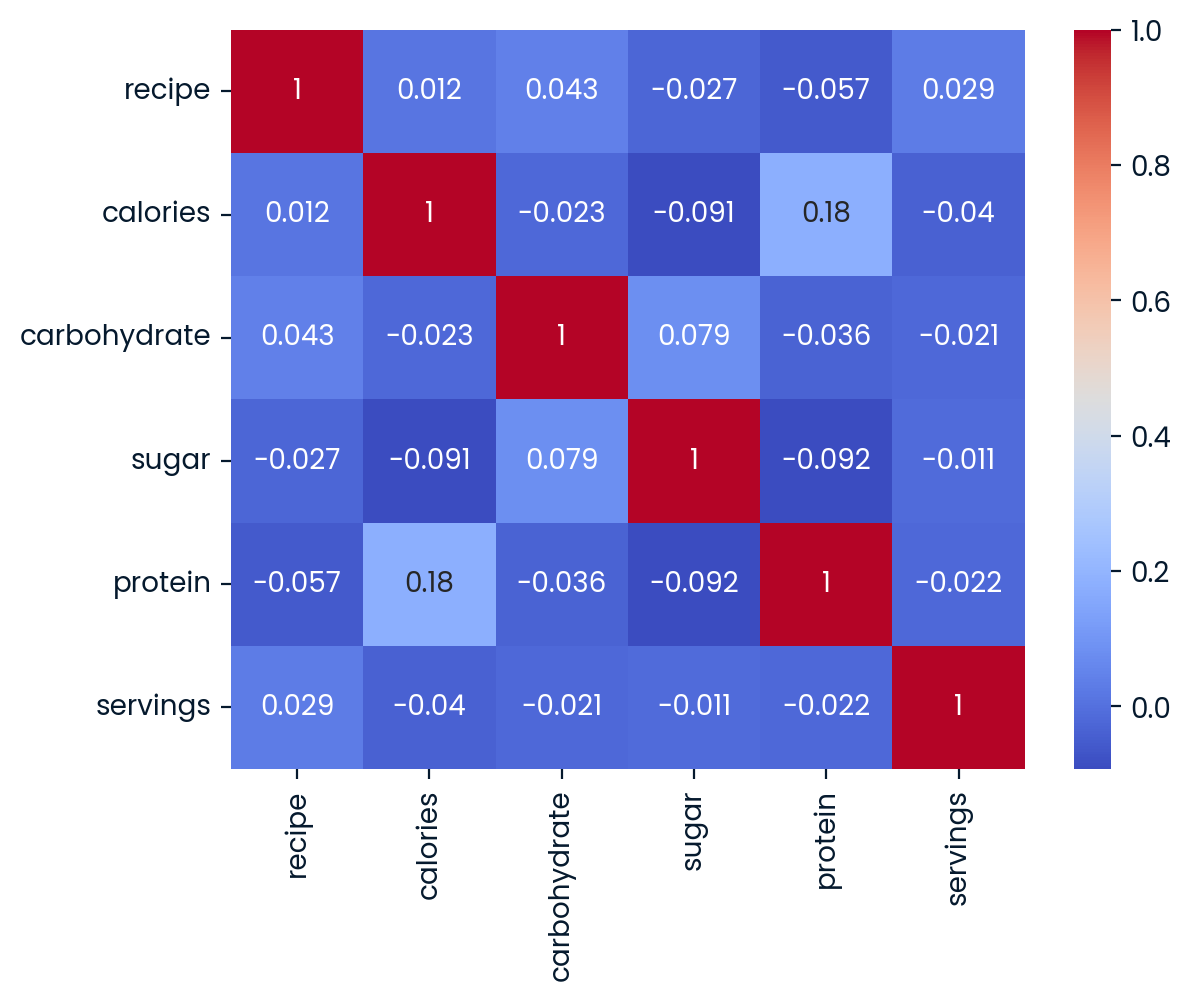

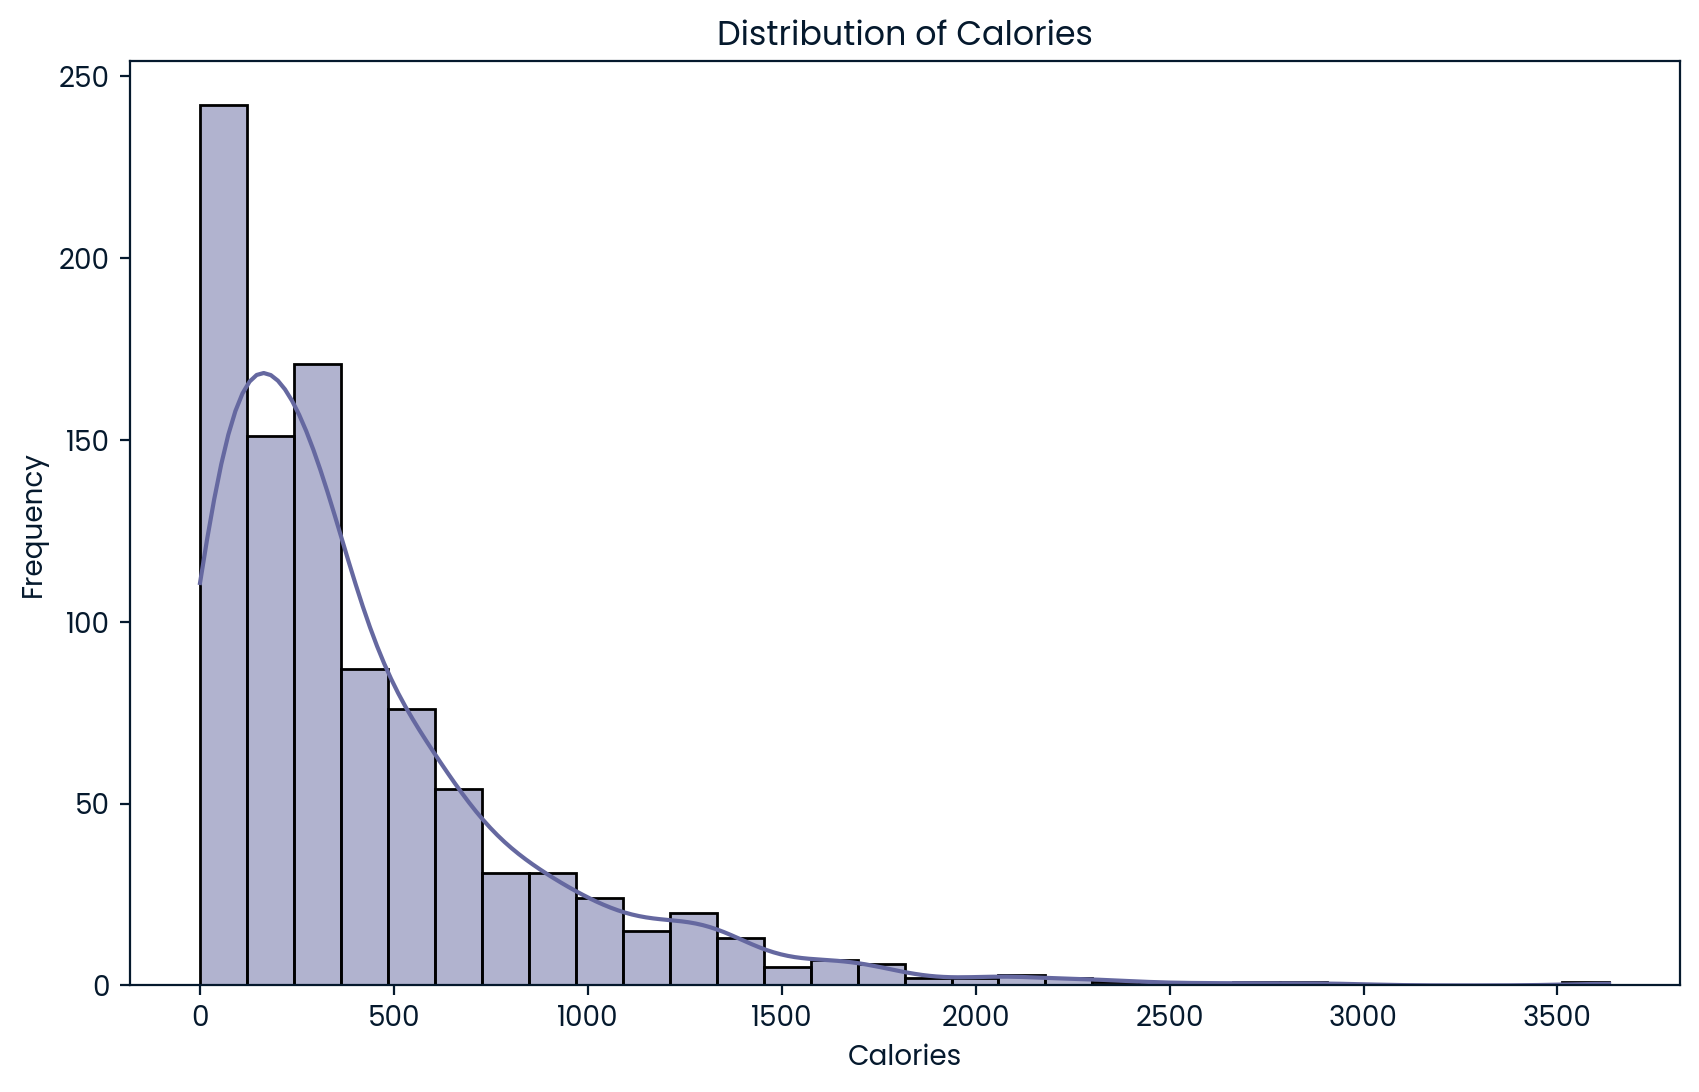

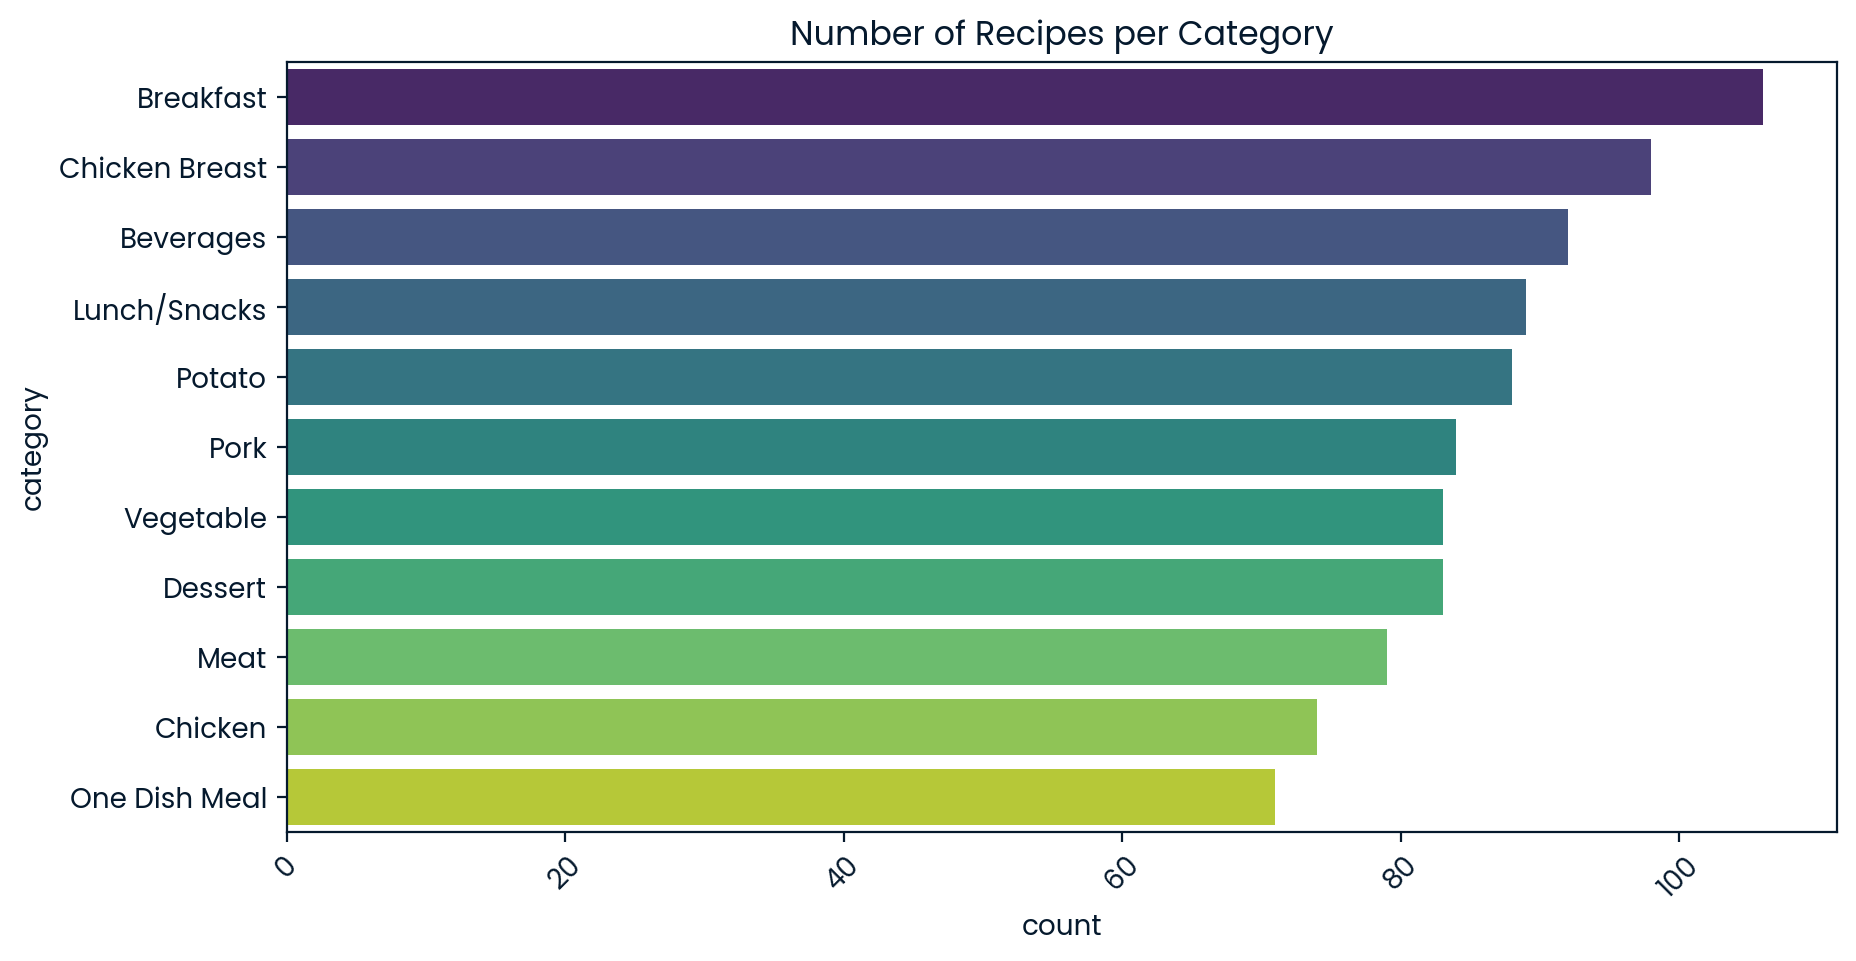

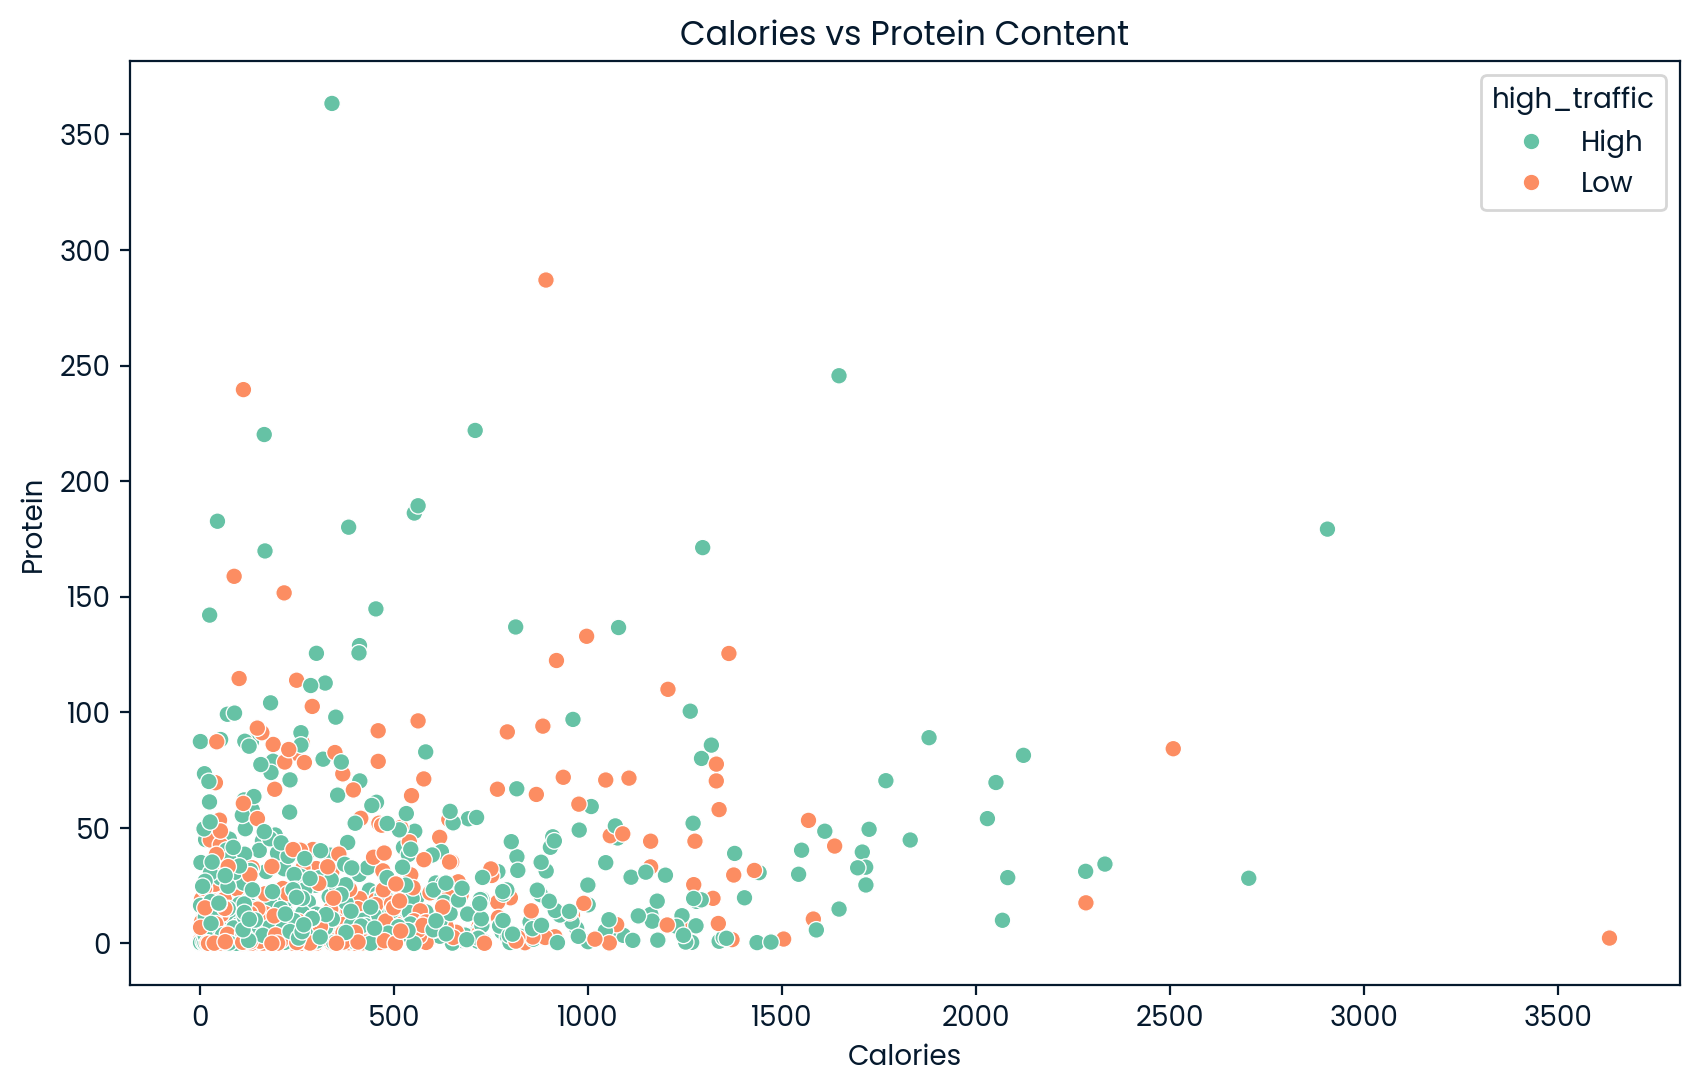

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned dataset
data = pd.read_csv('cleaned_recipe.csv')

# Summary statistics
print(data.describe())

# Dropping non-numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Single-variable analysis: Distribution of Calories
plt.figure(figsize=(10, 6))
sns.histplot(data['calories'], bins=30, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# Single-variable analysis: Recipe Categories
plt.figure(figsize=(10, 5))
sns.countplot(data['category'], order=data['category'].value_counts().index, palette='viridis')
plt.title('Number of Recipes per Category')
plt.xticks(rotation=45)
plt.show()

# Multi-variable analysis: Calories vs Protein Content
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='calories', y='protein', hue='high_traffic', palette='Set2')
plt.title('Calories vs Protein Content')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.show()

## Model Development
This is a binary classification problem where we aim to predict whether a recipe will lead to high traffic (High or Low, hence binary)

I decided to use a Random Forest model due to its robustness to noise and outliers because it uses multiple decision trees. Another reason is the use of multiple trees reduces the risk of overitting because of the voting/averaging of output from multiple trees.

The comparison model will be a Logistic regression model as I have found them to be very popular in handling binary classification problems.

### Results
1. Accuracy
Baseline Model (Random Forest):

Accuracy: 0.7316 (73.16%)

Comparison Model (Logistic Regression):

Accuracy: 0.7632 (76.32%)

Conclusion: The Logistic Regression model has a slightly higher accuracy (76.32%) compared to the Random Forest model (73.16%).

2. Precision
Baseline Model (Random Forest):

Class 0 (Low Traffic): 0.75

Class 1 (High Traffic): 0.73

Comparison Model (Logistic Regression):

Class 0 (Low Traffic): 0.79

Class 1 (High Traffic): 0.72

Conclusion:

For Class 0 (Low Traffic), the Logistic Regression model has a higher precision (0.79) compared to the Random Forest model (0.75).

For Class 1 (High Traffic), the precision is slightly lower for the Logistic Regression model (0.72) compared to the Random Forest model (0.73).

3. Recall
Baseline Model (Random Forest):

Class 0 (Low Traffic): 0.87

Class 1 (High Traffic): 0.53

Comparison Model (Logistic Regression):

Class 0 (Low Traffic): 0.81

Class 1 (High Traffic): 0.69

Conclusion:

For Class 0 (Low Traffic), the Random Forest model has a higher recall (0.87) compared to the Logistic Regression model (0.81).

For Class 1 (High Traffic), the Logistic Regression model has a significantly higher recall (0.69) compared to the Random Forest model (0.53). This is a major improvement, as the Random Forest model struggled to identify "High Traffic" recipes.

4. F1-Score
Baseline Model (Random Forest):

Class 0 (Low Traffic): 0.79

Class 1 (High Traffic): 0.62

Comparison Model (Logistic Regression):

Class 0 (Low Traffic): 0.80

Class 1 (High Traffic): 0.70

Conclusion:

For Class 0 (Low Traffic), the F1-Score is slightly higher for the Logistic Regression model (0.80) compared to the Random Forest model (0.79).

For Class 1 (High Traffic), the F1-Score is significantly higher for the Logistic Regression model (0.70) compared to the Random Forest model (0.62). This indicates that the Logistic Regression model is better at balancing precision and recall for "High Traffic" predictions.

## Recommendation
Deploy the Logistic Regression Model:

Given the better performance across most metrics, especially for "High Traffic" predictions, the Logistic Regression model is the better choice for deployment.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Load the cleaned dataset
data = pd.read_csv('cleaned_recipe.csv')

# Clean the 'servings' column to ensure it contains only numeric values
data['servings'] = pd.to_numeric(data['servings'], errors='coerce')
data['servings'].fillna(data['servings'].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ['category', 'high_traffic']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Features and target variable
X = data.drop('high_traffic', axis=1)
y = data['high_traffic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model: Random Forest Classifier
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions
y_pred = baseline_model.predict(X_test)

# Evaluation
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Comparison Model: Logistic Regression
comparison_model = LogisticRegression(random_state=42)
comparison_model.fit(X_train, y_train)

# Predictions
y_pred_comparison = comparison_model.predict(X_test)

# Evaluation
print("Comparison Model Accuracy:", accuracy_score(y_test, y_pred_comparison))
print("Comparison Model Classification Report:\n", classification_report(y_test, y_pred_comparison))

Baseline Model Accuracy: 0.7315789473684211
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       113
           1       0.73      0.53      0.62        77

    accuracy                           0.73       190
   macro avg       0.73      0.70      0.71       190
weighted avg       0.73      0.73      0.72       190

Comparison Model Accuracy: 0.7631578947368421
Comparison Model Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       113
           1       0.72      0.69      0.70        77

    accuracy                           0.76       190
   macro avg       0.75      0.75      0.75       190
weighted avg       0.76      0.76      0.76       190



## Cross-validation
Cross-validation helps assess how the model generalizes to unseen data.

Baseline Model (Random Forest):

The cross-validation scores range from 40.53% to 75.13%, with a mean score of 65.91%.
The lower score of 40.53% in one fold suggests that the model’s performance can vary significantly across different folds.

This indicates that the Random Forest model is less consistent and may not generalize well to unseen data in some cases.

Comparison Model (Logistic Regression):

The cross-validation scores range from 72.63% to 78.31%, with a mean score of 74.98%.
The scores are more consistent across the folds, with no extreme values like the Random Forest model.

This indicates that the Logistic Regression model is more stable and generalizes better to unseen data

In [13]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Baseline Model (Random Forest)
cv_scores_baseline = cross_val_score(baseline_model, X, y, cv=5)
print("Baseline Model Cross-Validation Scores:", cv_scores_baseline)
print("Baseline Model Mean CV Score:", cv_scores_baseline.mean())

# Cross-validation for Comparison Model (Logistic Regression)
cv_scores_comparison = cross_val_score(comparison_model, X, y, cv=5)
print("Comparison Model Cross-Validation Scores:", cv_scores_comparison)
print("Comparison Model Mean CV Score:", cv_scores_comparison.mean())

Baseline Model Cross-Validation Scores: [0.40526316 0.7        0.69312169 0.75132275 0.74603175]
Baseline Model Mean CV Score: 0.6591478696741854
Comparison Model Cross-Validation Scores: [0.73684211 0.72631579 0.74603175 0.78306878 0.75661376]
Comparison Model Mean CV Score: 0.7497744360902255


## Business Metric: Implement a User Rating System

I believe the business would be well served by allowing users to rate recipes on a pre-determined scale, for example, a 5 star scale. Below are some of the reasons why I advocate for this:
1. Encourages Engagement: By recommending recipes that users rate highly, the business can increase user engagement, retention, and satisfaction.
2. Measurable and Actionable: Ratings are easy to collect and analyze, making them a practical metric for the business to monitor.
3. It is directly tied to user's preferences: In this way, the business would get input from the users which could prove invaluable.

How the Business Should Monitor It:
1. Collect User Ratings: Implement a user rating system (e.g., 1 to 5 stars) for recipes on the website.
2. Track the Metric Over Time: Calculate the average rating for recipes on a regular basis (e.g., weekly or monthly). Compare this to the overall average rating of all recipes.
3. Set a Target: Define a target for the average rating of "High Traffic" predictions. For example: Target: The average rating for "High Traffic" predictions should be at least 1 star higher than the overall average rating.
4. Monitor Performance: Track how the metric changes as the model is refined or new data is collected. Use this metric to make decisions about model improvements or feature engineering.

Estimate the Initial Value(s) for the Metric
Simulate User Ratings
Since we don’t have real user ratings yet, we can simulate them based on the current data. For example: Assigning random ratings to recipes (e.g., 1 to 5 stars). We will assume that "High Traffic" predictions are more likely to receive higher ratings.

## Conclusion

## Final Summary:
The baseline model (Random Forest) achieved an accuracy of 73.16% and an F1 score of 0.72. While the model performs reasonably well, there is room for improvement as it was outperformed by the comparison model (Logistic Regression with an accuracy of 76.31% amd an F! score of 0.76). The business may focus on implementing a user rating system to better predict high-traffic recipes.

## Recommendations:
1. Experiment with feature engineering to improve model performance.
2. Try advanced models like XGBoost.
3. Collect more data to address class imbalance.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation